<a href="https://colab.research.google.com/github/MahmoudEssam707/Data-Tools/blob/main/Reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary libraries
import pandas as pd
# Visualisation - Word Cloud
from ipywidgets import interact, widgets
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout
import tensorflow as tf

In [ ]:
def wrangle(reuters_path):
    # Reading Data
    reuters_data =pd.read_csv(reuters_path)
    # Display the first few rows of the dataset
    print(reuters_data.head(),"#"*80,sep='\n')
    # Get basic statistics about the dataset
    print(reuters_data.describe(),"#"*80,sep='\n')
    # Count the occurrences of each topic
    topic_counts = reuters_data['TOPICS'].value_counts()
    print(topic_counts)
    # Remove NA
    reuters_data['BODY'] = reuters_data['BODY'].fillna('')
    # Text Preprocessing (cleanin and lowercasing 'BODY' fields)
    reuters_data['BODY'] = reuters_data['BODY'].str.lower()
    # Taking only needed columns
    columns=['TOPICS','BODY']
    reuters_data=reuters_data[columns]
    return reuters_data

In [ ]:
# Load reuters dataset
file_path= '/content/drive/MyDrive/Project Data Tools/Assignment 1/reuters_data.csv'
reuters_data = wrangle(reuters_path=file_path)
reuters_data

  REUTERS TOPICS   TOPICS                                             TITLE  \
0            YES    cocoa                                BAHIA COCOA REVIEW   
1            YES    grain  NATIONAL AVERAGE PRICES FOR FARMER-OWNED RESERVE   
2            YES  veg-oil     ARGENTINE 1986/87 GRAIN/OILSEED REGISTRATIONS   
3            YES     none                 USX <X> DEBT DOWGRADED BY MOODY'S   
4            YES     earn       CHAMPION PRODUCTS <CH> APPROVES STOCK SPLIT   

                                                BODY  
0  Showers continued throughout the week in the B...  
1  The U.S. Agriculture Department reported the f...  
2  Argentine grain board figures show crop regist...  
3  Moody's Investors Service Inc said it lowered ...  
4  Champion Products Inc said its board of direct...  
################################################################################
       REUTERS TOPICS TOPICS                                           TITLE  \
count           13151  13151      

,TOPICS,BODY
0,cocoa,showers continued throughout the week in the b...
1,grain,the u.s. agriculture department reported the f...
2,veg-oil,argentine grain board figures show crop regist...
3,none,moody's investors service inc said it lowered ...
4,earn,champion products inc said its board of direct...
...,...,...
13146,earn,shr 86 cts vs 74 cts net 11.1 mln vs 8.6 m...
13147,trade,the european community is willing to offer lim...
13148,crude,british foreign secretary sir geoffrey howe ba...
13149,acq,simon and schuster to acquire woodhead-faulkne...


In [ ]:
Topics_Count = reuters_data.groupby('TOPICS')['TOPICS'].count().sort_values()
Topics_Count

TOPICS
hk             1
soy-meal       1
austdlr        1
barley         1
rand           1
            ... 
grain        530
money-fx     654
none        2113
acq         2350
earn        3821
Name: TOPICS, Length: 83, dtype: int64

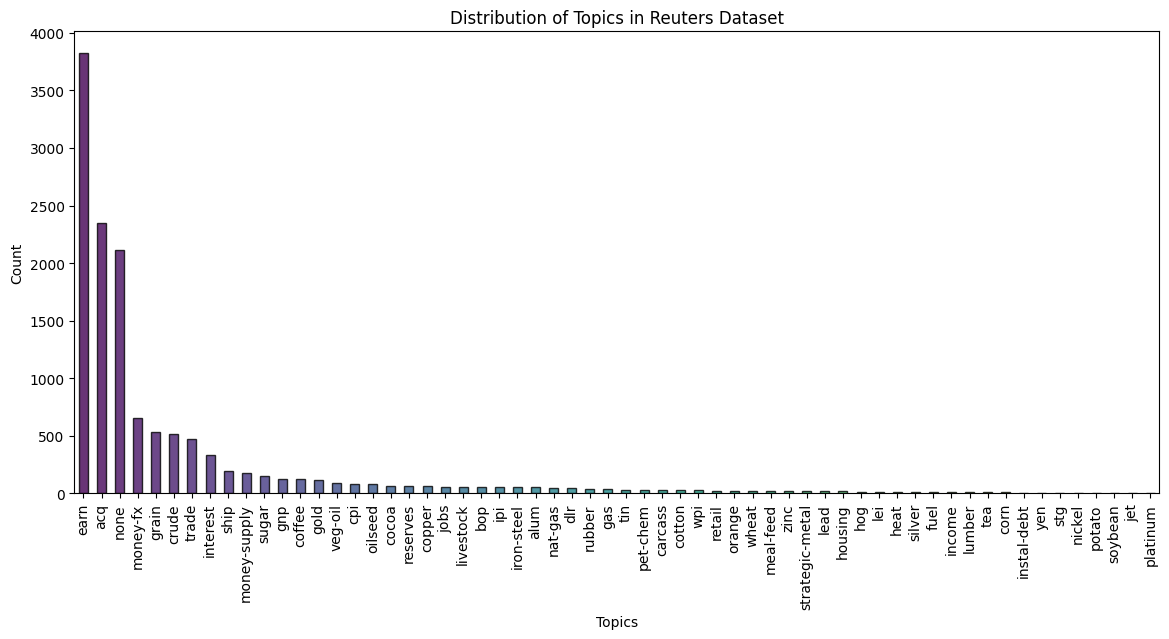

In [ ]:
import numpy as np

# Filter topics with counts greater than 3
filtered_topics = Topics_Count[Topics_Count.values > 3].sort_values(ascending=False)

# Set up the plot figure
plt.figure(figsize=(14, 6))

# Create a gradient color for the bars
gradient_colors = np.linspace(0, 1, len(filtered_topics))
bar_colors = plt.cm.viridis(gradient_colors)

# Plot the filtered topics with gradient-colored bars
filtered_topics.plot(kind='bar', color=bar_colors, edgecolor='black', alpha=0.8)

# Set plot title and labels
plt.title('Distribution of Topics in Reuters Dataset')
plt.xlabel('Topics')
plt.ylabel('Count')

# Display the plot
plt.show()


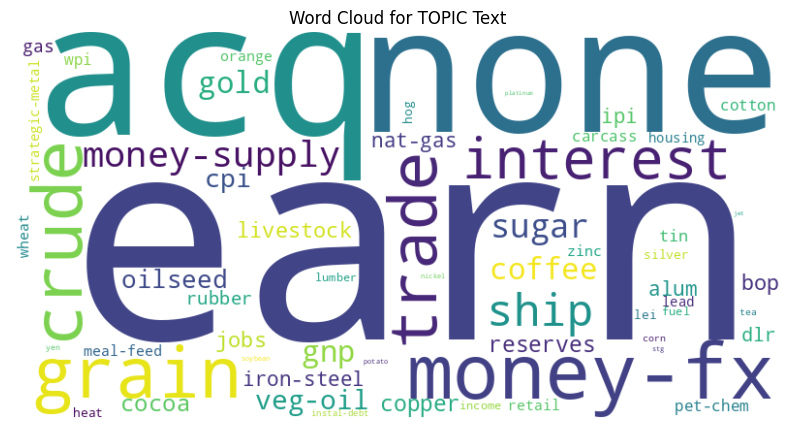

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(Topics_Count)
# Displaying the Word Cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for TOPIC Text')
plt.axis('off')
plt.show()

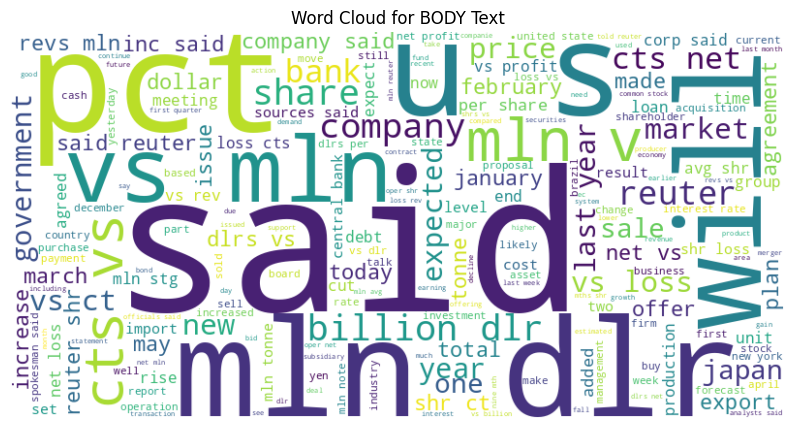

In [ ]:
body_text = ' '.join(reuters_data['BODY'])
wordcloud_body = WordCloud(width=800, height=400, background_color='white').generate(body_text)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_body, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for BODY Text')
plt.show()

In [ ]:
max_words = 1000

In [ ]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(reuters_data['BODY'])
sequences = tokenizer.texts_to_sequences(reuters_data['BODY'])

In [ ]:
maxlen = 100
X = pad_sequences(sequences, maxlen=maxlen)
X

array([[ 75, 862,  63, ..., 120, 330,  14],
       [ 10, 213,  94, ...,  41, 427,  14],
       [249, 862,  73, ..., 547,  56,  14],
       ...,
       [ 41,   1, 494, ...,  32,   7,  14],
       [  0,   0,   0, ..., 385,   9, 268],
       [  0,   0,   0, ..., 943, 427,  14]], dtype=int32)

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(reuters_data['TOPICS'])
y = to_categorical(y)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=50, input_length=maxlen))
model.add(Flatten())
model.add(Dense(64, activation='linear'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(reuters_data['TOPICS'].unique()), activation='sigmoid'))

In [ ]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)

In [ ]:
history=model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
288/288 [==============================] - 9s 23ms/step - loss: 2.2780 - accuracy: 0.3958 - val_loss: 1.5855 - val_accuracy: 0.6201
Epoch 2/20
288/288 [==============================] - 3s 11ms/step - loss: 1.5093 - accuracy: 0.6062 - val_loss: 1.2999 - val_accuracy: 0.6741
Epoch 3/20
288/288 [==============================] - 3s 11ms/step - loss: 1.1787 - accuracy: 0.6947 - val_loss: 1.1772 - val_accuracy: 0.7096
Epoch 4/20
288/288 [==============================] - 4s 14ms/step - loss: 0.9258 - accuracy: 0.7540 - val_loss: 1.1600 - val_accuracy: 0.7253
Epoch 5/20
288/288 [==============================] - 5s 19ms/step - loss: 0.7738 - accuracy: 0.7925 - val_loss: 1.2134 - val_accuracy: 0.7291
Epoch 6/20
288/288 [==============================] - 3s 10ms/step - loss: 0.6480 - accuracy: 0.8203 - val_loss: 1.2226 - val_accuracy: 0.7349
Epoch 7/20
288/288 [==============================] - 3s 11ms/step - loss: 0.5648 - accuracy: 0.8462 - val_loss: 1.3060 - val_accuracy: 0.7288

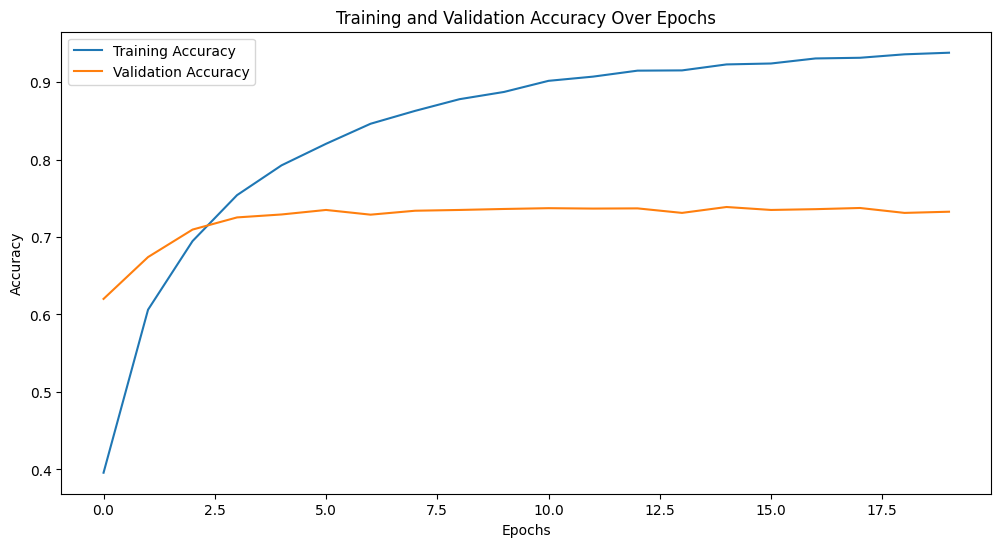

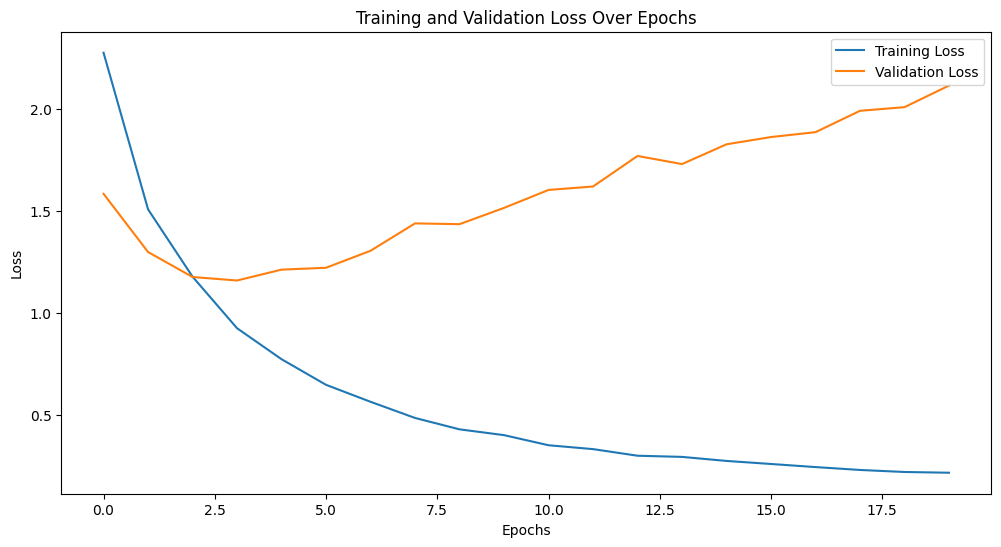

In [ ]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


124/124 [==============================] - 0s 3ms/step


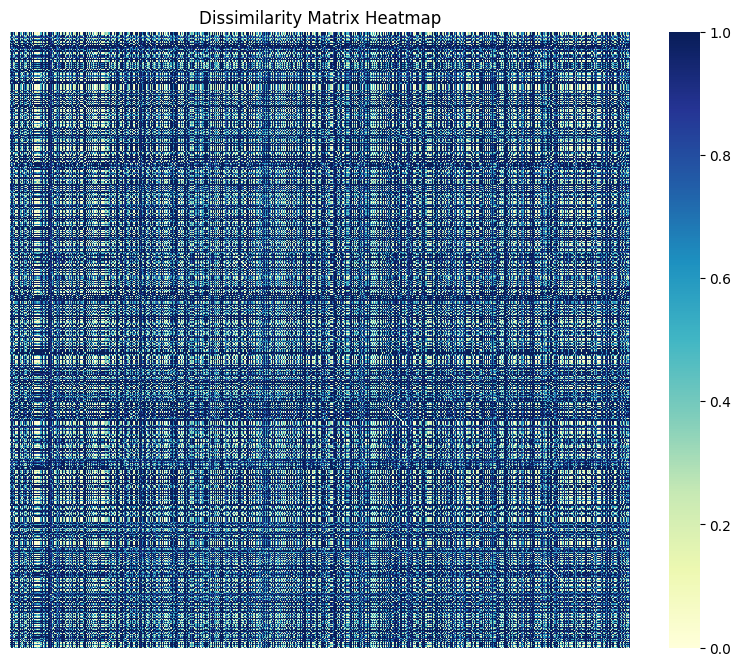

In [ ]:
# Assuming your model is already trained
predictions_test = model.predict(X_test)
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity
cosine_sim_matrix = cosine_similarity(predictions_test)

# Convert to dissimilarity
dissimilarity_matrix = 1 - cosine_sim_matrix


import seaborn as sns
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(dissimilarity_matrix, cmap="YlGnBu", xticklabels=False, yticklabels=False)
plt.title('Dissimilarity Matrix Heatmap')
plt.show()


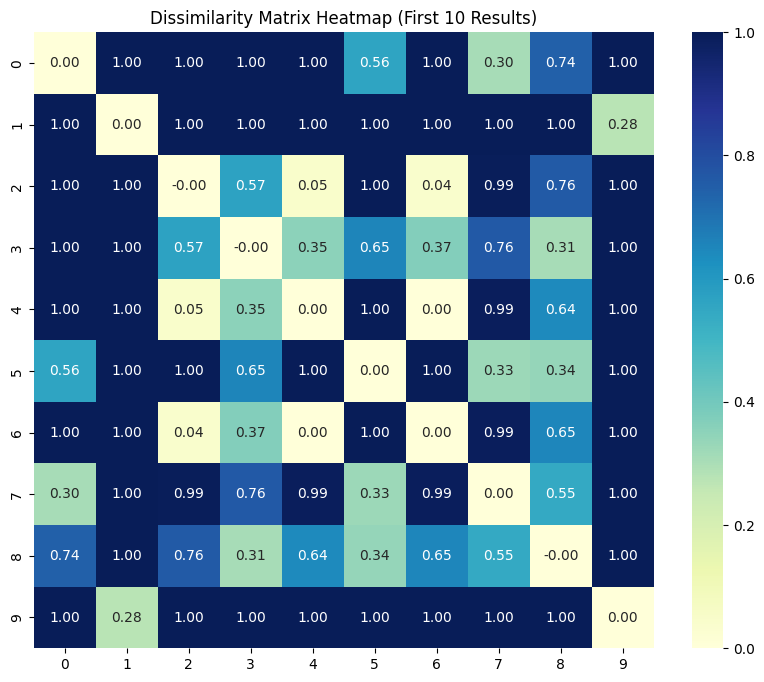

In [ ]:
import seaborn as sns
# Limit to the first 10 rows and columns
dissimilarity_matrix_subset = dissimilarity_matrix[:10, :10]
# Create a heatmap with row and column labels
plt.figure(figsize=(10, 8))
sns.heatmap(dissimilarity_matrix_subset, cmap="YlGnBu", annot=True, fmt=".2f", xticklabels=True, yticklabels=True)
plt.title('Dissimilarity Matrix Heatmap (First 10 Results)')
plt.show()

In [ ]:
pd.DataFrame(dissimilarity_matrix).to_csv("dissimilarity_matrix.csv")

In [ ]:
def predict_topic(new_body_text, model, tokenizer, label_encoder, maxlen):
    new_sequence = tokenizer.texts_to_sequences([new_body_text])
    new_padded_sequence = pad_sequences(new_sequence, maxlen=maxlen)

    predictions = model.predict(new_padded_sequence)

    predicted_topic_index = predictions.argmax()
    predicted_topic = label_encoder.classes_[predicted_topic_index]

    return predicted_topic
new_body_text = "Global demand for grains is on the rise."
predicted_topic = predict_topic(new_body_text, model, tokenizer, label_encoder, maxlen)
print("Predicted Topic:", predicted_topic)


In [ ]:
def predict_and_display_topic(new_body_text):
    predicted_topic = predict_topic(new_body_text, model, tokenizer, label_encoder, maxlen)
    print("Predicted Topic:", predicted_topic)

# Create an interactive widget for entering text
text_input = widgets.Text(value='Global demand for dollars is on the rise.', description='Enter Text:')

# Create an interactive widget for triggering predictions
interact(predict_and_display_topic, new_body_text=text_input);

interactive(children=(Text(value='Global demand for grains is on the rise.', description='Enter Text:'), Outpu…